In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read in MammographicCleanData dataset 
Mamm = pd.read_csv('C:\\FromOldLaptop\\UW-data science\\Course1-DS-Process and tools\\Week9\\MammographicCleanData.csv',delimiter=",")




In [3]:
# print the first10 rows of data from the dataframe
Mamm.head(10)

,DensityNormal,BI-RADSNormal,Age,Severity,Age-Group,Shape_lobular,Shape_oval,Shape_round,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated
0,0.666667,0.833333,67,1,4.0,1,0,0,0,0,0,1
1,0.666667,0.666667,43,1,3.0,0,0,1,0,0,0,0
2,0.666667,0.833333,58,1,3.0,0,0,0,0,0,0,1
3,0.666667,0.666667,28,0,2.0,0,0,1,0,0,0,0
4,0.666667,0.833333,74,1,4.0,0,0,1,0,0,0,1
5,0.666667,0.666667,65,0,4.0,0,0,1,0,0,0,1
6,0.666667,0.666667,70,0,4.0,0,0,1,0,0,0,1
7,0.666667,0.833333,42,0,3.0,0,0,1,0,0,0,1
8,0.666667,0.833333,57,1,3.0,0,0,1,0,0,0,1
9,0.000000,0.833333,60,1,3.0,0,0,1,0,0,0,1


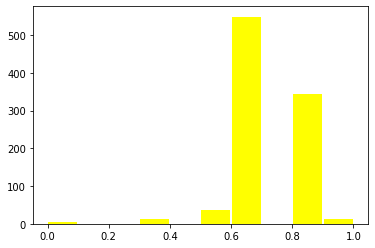

In [4]:
plt.hist(Mamm.loc[:, "BI-RADSNormal"],rwidth=0.95,color='yellow')
plt.show()

No handles with labels found to put in legend.


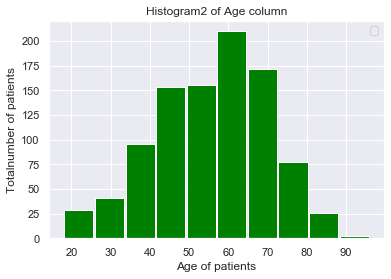

In [6]:
# Check the distribution of the "Age" column
# Corece to numeric and impute medians for Age column
import seaborn as sns
sns.set()

Mamm.loc[:, "Age"] = pd.to_numeric(Mamm.loc[:, "Age"], errors='coerce')
HasNan = np.isnan(Mamm.loc[:,"Age"]) 
Mamm.loc[HasNan, "Age"] = np.nanmedian(Mamm.loc[:,"Age"])
sns.set()
plt.xlabel("Age of patients")
plt.ylabel("Totalnumber of patients")
plt.title("Histogram2 of Age column")
plt.legend()

plt.hist(Mamm.loc[:, "Age"],rwidth=0.95,color='green')
plt.show()

No handles with labels found to put in legend.


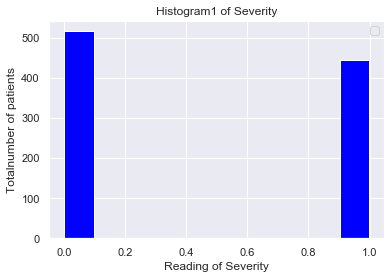

In [7]:
#Check the distribution of the "Severity" column
MammSeverity= Mamm.loc[:,'Severity']

plt.xlabel("Reading of Severity")
plt.ylabel("Totalnumber of patients")
plt.title("Histogram1 of Severity")
plt.legend()
plt.hist(Mamm.loc[:, "Severity"],rwidth=0.95,color='blue')
plt.show()

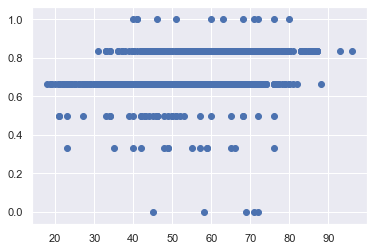

In [9]:
# Plot all the numeric columns against each other
import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
#scatter_matrix(Mamm)
plt.scatter(Mamm['Age'],Mamm['BI-RADSNormal'])
plt.show()

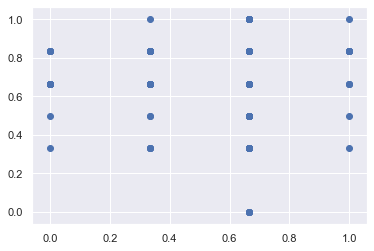

In [10]:
#_ = scatter_matrix(Mamm, c=Mamm.loc[:,"Severity"], figsize=[8,8], s=1000)

plt.scatter(Mamm['DensityNormal'],Mamm['BI-RADSNormal'])
plt.show()

# From above scatter graph, we can confidently say that there is no linear corelation between Density and BIRADS and Age and BIRADS
# Predict the severity of the mammography to perform biopsy
# This is a classification problem
# Severity: benign=0 or malignant=1 (binominal)
# Severity as tageget variable
    define X and y

In [11]:
feature_cols = ['BI-RADSNormal', 'Age', 'DensityNormal','Shape_lobular','Shape_oval','Shape_round','Margin_microlobulated','Margin_spiculated']
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = Mamm[feature_cols]

In [13]:
# y is a vector, hence we use dot to access 'label'
y = Mamm.Severity
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

In [14]:
# Spliting data in 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training sample having dimesions===")
print(X_train.shape)
print("Testing sample having dimensions=====")
print(X_test.shape)


Training sample having dimesions===
(768, 8)
Testing sample having dimensions=====
(193, 8)


In [15]:
# Fit and Test Logistic regression model#Logistic regression model
# instantiate model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# fit model
logreg.fit(X_train, y_train)

C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
print(y_pred_class)

[0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1
 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0
 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 0]


In [17]:
# import sklearn KNNclassifier module
from sklearn.neighbors import KNeighborsClassifier 
# instantiate model
knn= KNeighborsClassifier()
# fit model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
#make predictions
y_knn_pred_class= knn.predict(X_test)
print(y_knn_pred_class)


[0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 1 0]


In [19]:
#import sklearn SVC module 
from sklearn.svm import SVC
print ('\n\nSupport Vector Machine classifier\n')
# instantiate model
svm = SVC()



Support Vector Machine classifier



In [20]:
# fit model
svm.fit(X_train, y_train)

C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
# make predictions on test data set
y_svm_pred_class = svm.predict(X_test)
print (y_svm_pred_class)

[0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 1 0]


In [22]:
### Fit and apply Descion tree classifier#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#instentiate the model
dtc = DecisionTreeClassifier()

In [24]:
#fit model
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
# Make predictions on test data set
y_dtc_pred_class= dtc.predict(X_test)
print(y_dtc_pred_class)

[0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 0 0 0 1 0 1 1 0]


In [26]:
#Calculate classification accuracy
from sklearn import metrics
# Classification accuracy of logistic regression
print(metrics.accuracy_score(y_test,y_pred_class))

0.8290155440414507


In [27]:
# Classification accuracy of KNN
print(metrics.accuracy_score(y_test,y_knn_pred_class))

0.7616580310880829


In [29]:
# Classification accuracy of Decision tree
print(metrics.accuracy_score(y_test,y_dtc_pred_class))

0.7512953367875648


In [30]:
# Classification accuracy of support vector Matrix
print(metrics.accuracy_score(y_test,y_svm_pred_class))


0.7616580310880829


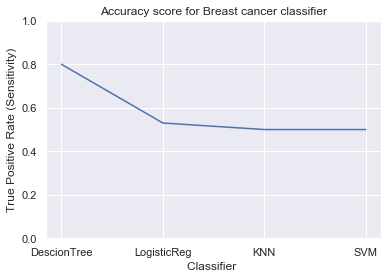

In [31]:
Acc_score = [0.80,0.53,0.50,0.50]
Classifier=['DescionTree','LogisticReg','KNN','SVM']
plt.plot(Classifier,Acc_score)
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Accuracy score for Breast cancer classifier')
plt.xlabel('Classifier ')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import itertools
from IPython.display import display

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "orange")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
def compute_cnf(classifier,x_test,y_test):
    cnf_matrix = confusion_matrix(classifier.predict(x_test),y_test)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Benign','Malignant'],
                      title='Confusion matrix, without normalization')

    plt.show()

In [35]:
from sklearn.metrics import f1_score as fscorer

def f1_score(classifier,x_test,y_test):
    return fscorer(classifier.predict(X_test),y_test)

In [36]:
#Calculate confusion matrix for logistic regression
from sklearn.metrics import *
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

[[92 16]
 [17 68]]


In [37]:
print("True positives are") 
TP = confusion[1,1]
print(TP)

True positives are
68


In [38]:
print("True Negatives are") 
TN = confusion[0,0]
print(TN)

True Negatives are
92


In [39]:
print("False positives are") 
FP = confusion[0,1]
print(FP)

False positives are
16


In [40]:
print("False negatives are") 
FN = confusion[1,0]
print(FN)


False negatives are
17


In [41]:
print(accuracy_score(y_test, y_pred_class))

0.8290155440414507


In [42]:
# calculate error rate
print(1 - accuracy_score(y_test, y_pred_class))


0.17098445595854928


In [43]:
#recall 
print(recall_score(y_test, y_pred_class))

0.8


In [44]:
#precision
print(precision_score(y_test, y_pred_class))


0.8095238095238095


In [45]:
#f1_score
print(f1_score(y_test, y_pred_class))

0.8047337278106509


In [46]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))

0.8290155440414507


C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[92 17]
 [16 68]]


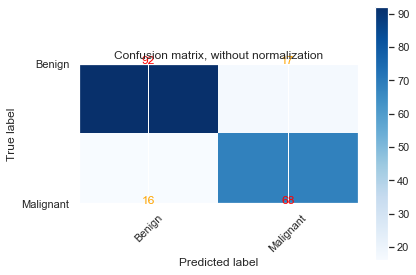

In [47]:
# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)

In [48]:
from sklearn.metrics import *

In [49]:
confusion = confusion_matrix(y_test, y_dtc_pred_class)
print(confusion)


[[87 21]
 [27 58]]


In [50]:
print("True positives are") 
TP = confusion[1,1]
print(TP)
print("True Negatives are") 
TN = confusion[0,0]
print(TN)
print("False positives are") 
FP = confusion[0,1]
print(FP)
print("False negatives are") 
FN = confusion[1,0]
print(FN)


True positives are
58
True Negatives are
87
False positives are
21
False negatives are
27


In [51]:
# calculate error rate
print(1 - accuracy_score(y_test, y_dtc_pred_class))

#recall 
print(recall_score(y_test, y_dtc_pred_class))

#precision
print(precision_score(y_test, y_dtc_pred_class))

#f1_score
print(f1_score(y_test, y_dtc_pred_class))

0.24870466321243523
0.6823529411764706
0.7341772151898734
0.7073170731707317


In [52]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))

0.7512953367875648


Confusion matrix, without normalization
[[88 28]
 [20 57]]


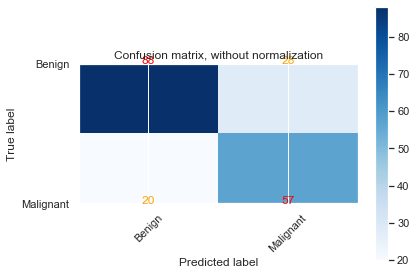

In [53]:
# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)

In [54]:
#Calculate confusion matrix for K nearest mean
from sklearn.metrics import *
confusion = confusion_matrix(y_test, y_knn_pred_class)
print(confusion)


[[81 27]
 [19 66]]


In [55]:
print("True positives are")
TP = confusion[1,1]
print(TP)
print("True Negatives are") 
TN = confusion[0,0]
print(TN)
print("False positives are") 
FP = confusion[0,1]
print(FP)
print("False negatives are") 
FN = confusion[1,0]
print(FN)

classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))


True positives are
66
True Negatives are
81
False positives are
27
False negatives are
19
0.7616580310880829


Confusion matrix, without normalization
[[81 19]
 [27 66]]


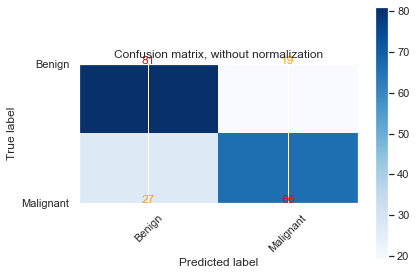

In [56]:
# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)

In [57]:
#Calculate confusion matrix for support vector Matrix
from sklearn.metrics import *
confusion = confusion_matrix(y_test, y_svm_pred_class)
print(confusion)

[[84 24]
 [22 63]]


In [58]:
print("True positives are")
TP = confusion[1,1]
print(TP)
print("True Negatives are") 
TN = confusion[0,0]
print(TN)
print("False positives are") 
FP = confusion[0,1]
print(FP)
print("False negatives are") 
FN = confusion[1,0]


classifier = SVC()
classifier.fit(X_train,y_train)
print (classifier.score(X_test,y_test))

True positives are
63
True Negatives are
84
False positives are
24
False negatives are
0.7616580310880829


C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization
[[84 22]
 [24 63]]


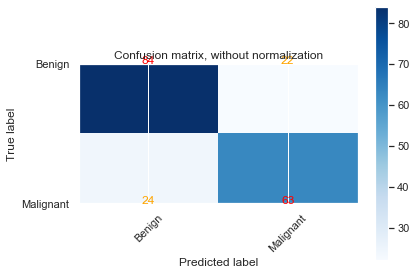

In [59]:
# Compute and plot confusion matrix
compute_cnf(classifier,X_test,y_test)

In [60]:
#Calculate recall or sensitivity score
from sklearn import metrics
# Classification accuracy of logistic regression
print(metrics.recall_score(y_test,y_pred_class))

0.8


0.7764705882352941
0.6823529411764706
0.7411764705882353


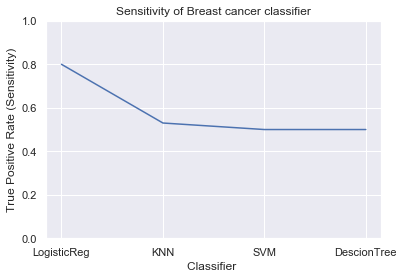

In [61]:
# Classification accuracy of KNN
print(metrics.recall_score(y_test,y_knn_pred_class))

# Classification accuracy of Decision tree
print(metrics.recall_score(y_test,y_dtc_pred_class))

# Classification accuracy of support vector Matrix
print(metrics.recall_score(y_test,y_svm_pred_class))

recall_score = [0.79,0.75,0.70,0.64]
Classifier=['LogisticReg','KNN','SVM','DescionTree']
plt.plot(Classifier,Acc_score)
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Sensitivity of Breast cancer classifier')
plt.xlabel('Classifier ')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


In [62]:
#IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate

# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

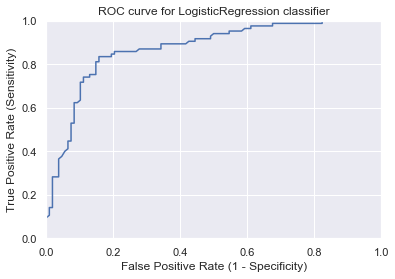

In [63]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for LogisticRegression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

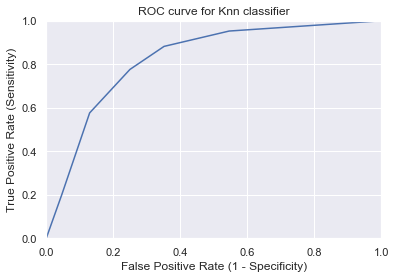

In [64]:
# store the predicted probabilities for class Knn
knn_y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Knn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

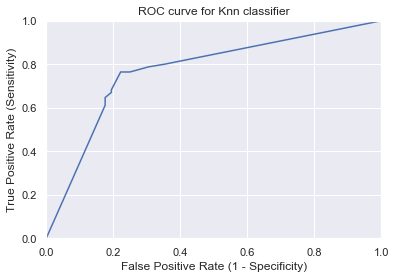

In [65]:
y_pred_prob = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Knn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [66]:
##ROC Analysis for all Classifiers
# Parameters for the AUC Plot
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC1 = 'red' # Line Color 
LC2 = 'blue' # Line Color 
LC3 = 'orange' # Line Color 
LC4 = 'black' # Line Color 
LC5 = 'cyan' # Line Color 
LC6 = 'green' # Line Color 

In [67]:
def getAUCScore(testdata,preddata,classifiername):
    fpr, tpr, th = roc_curve(testdata, preddata) # False Positive Rate, True Positive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    print ("For Classifier ",classifiername,":")
    print ("\nTP rates:", np.round(tpr, 2))
    print ("\nFP rates:", np.round(fpr, 2))
    print ("\nProbability thresholds:", np.round(th, 2),'\n\n')
    return fpr, tpr, th, AUC

In [68]:
fpr_logreg, tpr_logreg, th_logreg, AUC_logreg = getAUCScore(y_test, y_pred_class, "Logistic Regression")
fpr_dt, tpr_dt, th_dt, AUC_dt = getAUCScore(y_test, y_dtc_pred_class, "Decision Tree")
fpr_knn, tpr_knn, th_knn, AUC_knn = getAUCScore(y_test, y_knn_pred_class, "k Nearest Neighbors")
fpr_sv, tpr_sv, th_sv, AUC_sv = getAUCScore(y_test, y_svm_pred_class, "Support vector")

For Classifier  Logistic Regression :

TP rates: [0.  0.8 1. ]

FP rates: [0.   0.15 1.  ]

Probability thresholds: [2 1 0] 


For Classifier  Decision Tree :

TP rates: [0.   0.68 1.  ]

FP rates: [0.   0.19 1.  ]

Probability thresholds: [2 1 0] 


For Classifier  k Nearest Neighbors :

TP rates: [0.   0.78 1.  ]

FP rates: [0.   0.25 1.  ]

Probability thresholds: [2 1 0] 


For Classifier  Support vector :

TP rates: [0.   0.74 1.  ]

FP rates: [0.   0.22 1.  ]

Probability thresholds: [2 1 0] 




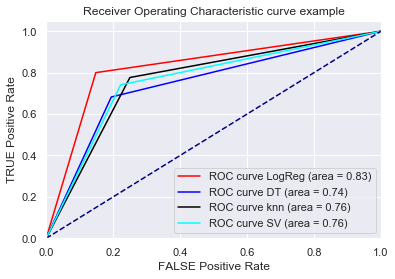

In [69]:
#Plot the Results of ROC Analysis/AUC Score
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr_logreg, tpr_logreg, color=LC1,lw=LW, label='ROC curve LogReg (area = %0.2f)' % AUC_logreg)
plt.plot(fpr_dt, tpr_dt, color=LC2,lw=LW, label='ROC curve DT (area = %0.2f)' % AUC_dt)
plt.plot(fpr_knn, tpr_knn, color=LC4,lw=LW, label='ROC curve knn (area = %0.2f)' % AUC_knn)
plt.plot(fpr_sv, tpr_sv, color=LC5,lw=LW, label='ROC curve SV (area = %0.2f)' % AUC_sv)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for SVM
plt.legend(loc=LL)
plt.show()

# Conclusion
In this problem false negatives (FN) should not acceptable. 
If patient is actually having malignant but it is predicted as non-cancerous, is most dangerous so our aim is to improve sensitivity. In other words we need to focus on sensitivity Sensitivity means- When actual value is positive, how often it is predicted correctly? Also known as Recall rate.
What is best fit predictive model? 
# So in the graph above we can clearly see, logistic regression has the highest value of sensitivity. so it is best fit predictive model